<a href="https://colab.research.google.com/github/KaviSanth/models/blob/master/Copy_of_Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pylab as plt

In [3]:
import tensorflow as tf

In [4]:
!pip install tensorflow-hub

In [5]:
!pip install tensorflow-datasets

In [6]:
import tensorflow_hub as hub

In [7]:
from tensorflow.keras import layers
!wget "https://cdn.pixabay.com/photo/2019/05/13/22/19/cat-baby-4201051_1280.jpg"


--2020-09-25 13:59:08--  https://cdn.pixabay.com/photo/2019/05/13/22/19/cat-baby-4201051_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:15b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 171912 (168K) [image/jpeg]
Saving to: ‘cat-baby-4201051_1280.jpg’

cat-baby-4201051_12 100%[===================>] 167.88K  --.-KB/s    in 0.02s   

2020-09-25 13:59:08 (10.5 MB/s) - ‘cat-baby-4201051_1280.jpg’ saved [171912/171912]



In [8]:
classifier_url ="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4" 

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

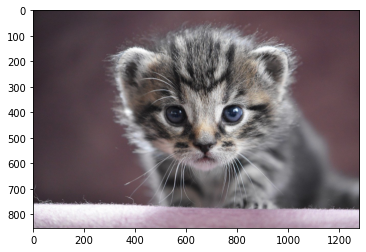

In [9]:
import cv2

img = cv2.imread("cat-baby-4201051_1280.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = cv2.imwrite("cat.jpg",img_cvt)
plt.imshow(img_cvt)


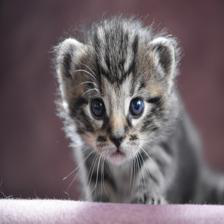

In [10]:
import numpy as np
import PIL.Image as Image

image = Image.open("cat-baby-4201051_1280.jpg")
new_image = image.resize((224, 224))
new_image.save('image_400.jpg')
#Labrador = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
Labrador = Image.open("image_400.jpg")
Labrador 

In [11]:
Labrador = np.array(Labrador)/255.0
result = classifier.predict(Labrador[np.newaxis, ...])
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

286

In [12]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


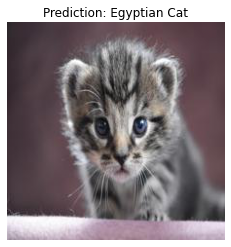

In [13]:
plt.imshow(Labrador)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

196608/195196 [==============================] - 0s 0us/step


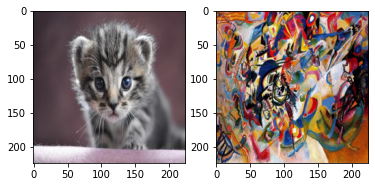

In [14]:
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')
cat = Image.open(style_path).resize(IMAGE_SHAPE)

content_image = Labrador
style_image = cat

plt.subplot(1, 2, 1)
plt.imshow(content_image)

plt.subplot(1, 2, 2)
plt.imshow(style_image)

In [15]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [16]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [17]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [18]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

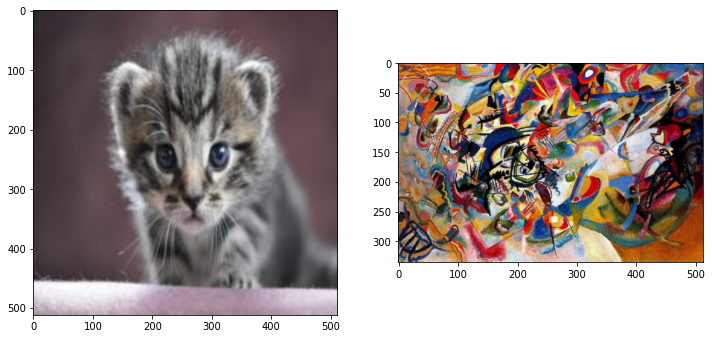

In [21]:
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')
style_image = load_img(style_path)

image1 = Image.open('cat-baby-4201051_1280.jpg')
new_image1 = image1.resize((224, 224))
new_image1.save('image_40.jpg')

content = load_img('image_40.jpg')

plt.subplot(1, 2, 1)
imshow(content)

plt.subplot(1, 2, 2)
imshow(style_image)

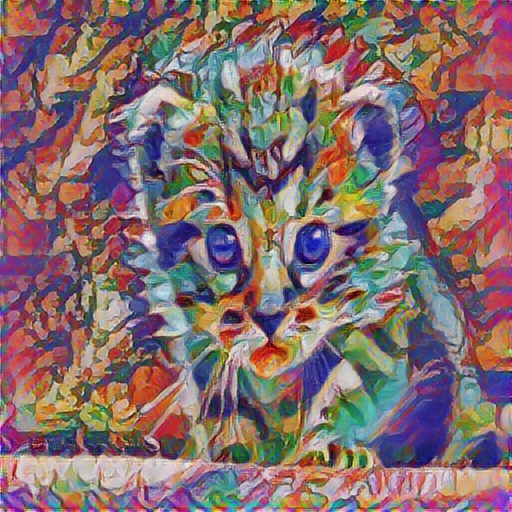

In [22]:
import tensorflow_hub as hub
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(content), tf.constant(style_image))[0]
tensor_to_image(stylized_image)